In [1]:
import os
from dotenv import load_dotenv
load_dotenv(override=True)

os.environ['TOKENIZERS_PARALLELISM']='true'

os.environ['LANGCHAIN_TRACING_V2']='true'
os.environ['LANGCHAIN_ENDPOINT']="https://api.smith.langchain.com"
os.environ['LANGCHAIN_API_KEY']=os.getenv("LANGCHAIN_API_KEY", None)
os.environ['LANGCHAIN_PROJECT']="LangGraph Reflection Agent"

In [2]:
from langchain_ibm import WatsonxLLM, ChatWatsonx
from ibm_watsonx_ai.metanames import GenTextParamsMetaNames as GenParams

def watsonx_model(model_id="mistralai/mixtral-8x7b-instruct-v01", decoding_method='greedy', max_new_tokens=4096, 
                  min_new_tokens=1, temperature=0.5, top_k=50, top_p=1, repetition_penalty=1):
    params = {
        GenParams.DECODING_METHOD: decoding_method,
        GenParams.MIN_NEW_TOKENS: min_new_tokens,
        GenParams.MAX_NEW_TOKENS: max_new_tokens,
        GenParams.RANDOM_SEED: 42,
        GenParams.TEMPERATURE: temperature,
        GenParams.TOP_K: top_k,
        GenParams.TOP_P: top_p,
        GenParams.REPETITION_PENALTY: repetition_penalty
    }
    ibm_cloud_url = os.getenv("IBM_CLOUD_URL", None)
    project_id = os.getenv("PROJECT_ID", None)
    api_key = os.getenv("API_KEY")
    watsonx_llm = ChatWatsonx(
        model_id=model_id,
        url=ibm_cloud_url,
        apikey=api_key,
        project_id=project_id,
        params=params,
    )
    return watsonx_llm

In [3]:
watsonx_llm = watsonx_model(model_id="ibm/granite-3-2-8b-instruct", max_new_tokens=16384, temperature=0.0)

### A simple Agent - Writing Linkedin Posts

In [4]:
from langchain_core.messages import AIMessage, BaseMessage, HumanMessage
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You write engaging Linkedin Posts."
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)

generate = prompt | watsonx_llm

In [5]:
request = "Write one about me completing day one of filming my AI agent course"

first_draft_response = generate.invoke({"messages": [("user", request)]})
print(first_draft_response.content)

🎥📚 Today marks the successful completion of Day One in the filming of my AI Agent Course! 🌟

It's an exhilarating journey, diving deep into the fascinating world of Artificial Intelligence. Each scene, each script, is a testament to the transformative power of AI in our daily lives. 

From the basics of AI to the intricacies of agent-based systems, we're setting the stage for a comprehensive learning experience. My goal? To make complex concepts accessible and engaging for everyone. 

This course isn't just about teaching AI; it's about sparking curiosity, fostering innovation, and preparing the next generation of tech leaders. 

Thank you to my incredible team for bringing this vision to life. Here's to many more days of insightful discussions, groundbreaking ideas, and, of course, more filming! 

Stay tuned for updates. Together, let's navigate the future of AI! 🚀 #AI #ArtificialIntelligence #AIAgentCourse #Education #Innovation #TechTrends


### Reflecting on our agent's work

In [6]:
reflection_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a marketing strategist looking over social media posts. Generate critique and recommendations for the user's post."
            " Provide detailed recommendations on things including length, style, etc.",
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)
reflect = reflection_prompt | watsonx_llm

In [7]:
reflection = reflect.invoke({"messages": [("user", request), ("user", first_draft_response.content)]})
print(reflection.content)

Critique:

1. Length: The post is concise and to the point, which is good for social media where attention spans can be short. However, it might benefit from a bit more detail to fully engage the audience.

2. Content: The post effectively communicates the excitement and importance of the project. It gives a glimpse into the course's scope and your ambitious goals. However, it could provide more specifics about what viewers can expect from the course.

3. Visuals: There are no images or videos accompanying the post. Visual content can significantly increase engagement on social media. Consider adding a behind-the-scenes photo or a short clip from the filming.

4. Call-to-Action: While you've ended with a strong call to stay tuned for updates, it could be more direct. Encourage followers to share the post, sign up for updates, or follow your page for more insights.

Recommendations:

1. Length: Expand the post slightly to include more specifics about the course content. For instance, yo

In [10]:
from IPython.display import Markdown
Markdown(reflection.content)

Critique:

1. Length: The post is concise and to the point, which is good for social media where attention spans can be short. However, it might benefit from a bit more detail to fully engage the audience.

2. Content: The post effectively communicates the excitement and importance of the project. It gives a glimpse into the course's scope and your ambitious goals. However, it could provide more specifics about what viewers can expect from the course.

3. Visuals: There are no images or videos accompanying the post. Visual content can significantly increase engagement on social media. Consider adding a behind-the-scenes photo or a short clip from the filming.

4. Call-to-Action: While you've ended with a strong call to stay tuned for updates, it could be more direct. Encourage followers to share the post, sign up for updates, or follow your page for more insights.

Recommendations:

1. Length: Expand the post slightly to include more specifics about the course content. For instance, you could mention a few key topics that will be covered in the first few modules or highlight a particularly engaging segment from Day One's filming.

2. Content: Provide more details about the course structure or a unique selling point. For example, "In just Day One, we covered 'Introduction to AI' and 'Understanding Agent-Based Systems', with interactive demonstrations to illustrate complex concepts."

3. Visuals: Include a relevant image or short video clip. This could be a screenshot from the filming, a graphic related to AI, or even a photo of your team in action. Make sure it's high-quality and visually appealing.

4. Call-to-Action: Make it more explicit. For instance, "Stay tuned for more updates and don't forget to follow us for exclusive behind-the-scenes content. Share this post to spread the word about the future of AI education!"

5. Hashtags: You've used relevant hashtags, but consider adding a few more niche ones related to AI education or tech trends to reach a broader audience.

6. Personal Touch: Share a personal anecdote or emotion from Day One. This could humanize your post and make it more relatable to your audience.

Revised Post:

🎥📚 Today marks the successful completion of Day One in the filming of my AI Agent Course! 🌟

Diving deep into the fascinating world of Artificial Intelligence, we covered 'Introduction to AI' and 'Understanding Agent-Based Systems', bringing complex concepts to life with interactive demonstrations. Each scene, each script, is a testament to AI's transformative power in our daily lives.

This course isn't just about teaching AI; it's about sparking curiosity, fostering innovation, and preparing the next generation of tech leaders. My goal? To make advanced AI concepts accessible and engaging for everyone.

Here's a sneak peek into our Day One filming (attach a relevant image or short clip). A huge thank you to my incredible team for bringing this vision to life. Here's to many more days of insightful discussions, groundbreaking ideas, and, of course, more filming!

Stay tuned for updates. Follow us for exclusive behind-the-scenes content and share this post to spread the word about the future of AI education! 🚀 #AI #ArtificialIntelligence #AIAgentCourse #Education #Innovation #TechTrends #AIforAll #FutureLeaders #LearningAI

### Turning this loop into a graph

In [11]:
from typing import Annotated, List, Sequence
from langgraph.graph import END, StateGraph, START
from langgraph.graph.message import add_messages
from typing_extensions import TypedDict

class State(TypedDict):
    messages: Annotated[list, add_messages]
    
def generation_node(state: State) -> State:
    return {"messages": [generate.invoke(state["messages"])]}

def reflection_node(state: State) -> State:
    # Other messages we need to adjust
    # First message is the original user request. We hold it the same for all nodes and use the most recent iteration
    translated = [state["messages"][0], HumanMessage(content=state["messages"][-1].content)]
    res = reflect.invoke(translated)
    # We treat the output of this as human feedback for the generator
    return {"messages": [HumanMessage(content=res.content)]}


builder = StateGraph(State)
builder.add_node("generate", generation_node)
builder.add_node("reflect", reflection_node)
builder.add_edge(START, "generate")

/Users/sourav/workstuffs/env_exp/lib/python3.11/site-packages/langgraph/checkpoint/base.py:18: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  from langgraph.serde.jsonplus import JsonPlusSerializer


In [12]:
def should_continue(state: State):
    if len(state["messages"]) >= 6:
        # End after 2 reflections
        return END
    return "reflect"


builder.add_conditional_edges("generate", should_continue)
builder.add_edge("reflect", "generate")
graph = builder.compile()

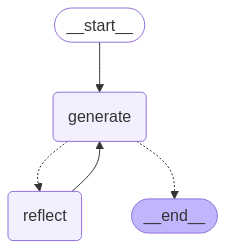

In [13]:
# Compile the graph
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [15]:
drafts = []
for event in graph.stream({"messages": [("user", request)]}):
    for node_name, output in event.items():
        print(f'At Node: {node_name}. Output: {output["messages"][-1].content}')
        if node_name == 'generate':
            drafts.append(output["messages"][-1])
        print('----')

At Node: generate. Output: 🎥📚 Today marks the successful completion of Day One in the filming of my AI Agent Course! 🌟

It's an exhilarating journey, diving deep into the fascinating world of Artificial Intelligence. Each scene, each script, is a testament to the transformative power of AI in our daily lives. 

From the basics of AI to the intricacies of agent-based systems, we're setting the stage for a comprehensive learning experience. My goal? To make complex concepts accessible and engaging for everyone. 

This course isn't just about teaching AI; it's about sparking curiosity, fostering innovation, and preparing the next generation of tech leaders. 

Thank you to my incredible team for bringing this vision to life. Here's to many more days of insightful discussions, groundbreaking ideas, and, of course, more filming! 

Stay tuned for updates. Together, let's navigate the future of AI! 🚀 #AI #ArtificialIntelligence #AIAgentCourse #Education #Innovation #TechTrends
----
At Node: re

In [17]:
for i, draft in enumerate(drafts):
    print(f'Draft {i}')
    print('-----------------------------------------------------------')
    print(draft.content)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')

Draft 0
-----------------------------------------------------------
🎥📚 Today marks the successful completion of Day One in the filming of my AI Agent Course! 🌟

It's an exhilarating journey, diving deep into the fascinating world of Artificial Intelligence. Each scene, each script, is a testament to the transformative power of AI in our daily lives. 

From the basics of AI to the intricacies of agent-based systems, we're setting the stage for a comprehensive learning experience. My goal? To make complex concepts accessible and engaging for everyone. 

This course isn't just about teaching AI; it's about sparking curiosity, fostering innovation, and preparing the next generation of tech leaders. 

Thank you to my incredible team for bringing this vision to life. Here's to many more days of insightful discussions, groundbreaking ideas, and, of course, more filming! 

Stay tuned for updates. Together, let's navigate the future of AI! 🚀 #AI #ArtificialIntelligence #AIAgentCourse #Education

In [19]:
# Listen for state updates
for event in graph.stream({"messages": [("user", request)]}, stream_mode=["messages", "values"]):
    print(event)
    if event[0] == 'values': 
        print(event[1].keys(), len(event[1]['messages']))
        print(event[1]['messages'][-1].content)

{'generate': {'messages': [AIMessage(content="🎥📚 Today marks the successful completion of Day One in the filming of my AI Agent Course! 🌟\n\nIt's an exhilarating journey, diving deep into the fascinating world of Artificial Intelligence. Each scene, each script, is a testament to the transformative power of AI in our daily lives. \n\nFrom the basics of AI to the intricacies of agent-based systems, we're setting the stage for a comprehensive learning experience. My goal? To make complex concepts accessible and engaging for everyone. \n\nThis course isn't just about teaching AI; it's about sparking curiosity, fostering innovation, and preparing the next generation of tech leaders. \n\nThank you to my incredible team for bringing this vision to life. Here's to many more days of insightful discussions, groundbreaking ideas, and, of course, more filming! \n\nStay tuned for updates. Together, let's navigate the future of AI! 🚀 #AI #ArtificialIntelligence #AIAgentCourse #Education #Innovation

KeyError: 0